### Importing Libraries

In [1]:
import numpy as np
import os
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import shutil
import time

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2022-10-10 03:24:04.727523: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-10 03:24:04.727557: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Extract Sample Images

In [2]:
# # Extracting all sample images
# from zipfile import ZipFile
  
# # specifying the zip file name
# file_names = ["dataset/sample_image/220930_addin_flagging.zip",
#              "dataset/sample_image/220930_kemas_flagging.zip",
#              "dataset/sample_image/220930_krisna_flagging.zip",
#              "dataset/sample_image/220930_rio_flagging.zip",
#              "dataset/sample_image/220930_vanda_flagging.zip"]
  
# # opening the zip file in READ mode
# for i in file_names :            
#     with ZipFile(i, 'r') as zip:
#         # printing all the contents of the zip file
#         zip.printdir()

#         # extracting all the files
#         print('\nExtracting all the files now...')
#         zip.extractall('dataset/sample_image')
#         print('Done!\n')

File Name                                             Modified             Size
Addin/5d8299c3-eadf-4cf8-ba52-3b9b602fa955_10.jpg 2022-10-01 04:19:40          725
Addin/8cdbd54b-50da-48f0-88b4-4cea8263df6c_5.jpg 2022-10-01 04:19:42          956
Addin/a599071d-a28f-452c-b374-6fe7f1112d43_7.jpg 2022-10-01 04:19:44          791
Addin/ad61f9a9-5da1-4857-ab86-00708017bdd3_4.jpg 2022-10-01 04:19:42          799
Addin/020d4469-afc0-4f60-a7bc-d146955508d2_2.jpg 2022-10-01 04:19:42          832
Addin/04c5f776-a11a-4250-a976-69c67a794ee3_14.jpg 2022-10-01 04:19:40          977
Addin/59b0b837-f121-4e5f-a507-53b13d7ce060_5.jpg 2022-10-01 04:19:44          738
Addin/444286be-233d-4983-b04b-649363508739_8.jpg 2022-10-01 04:19:42          812
Addin/14fb67e0-8e08-4584-bd5b-7ae7bbb3dcd7_12.jpg 2022-10-01 04:19:42          731
Addin/ee66d1e9-31d8-4d51-bb9f-8989e14405bb_5.jpg 2022-10-01 04:19:44          728
Addin/92b07b59-c64c-4538-bab9-8a519f7e2d67_13.jpg 2022-10-01 04:19:40          746
Addin/025f264f

In [3]:
# #Merge multiple folders into one folder
# # current folder path
# current_folder = os.getcwd() 
  
# # list of folders to be merged
# list_dir = ['dataset/sample_image/Addin', 
#             'dataset/sample_image/Krisna',
#             'dataset/sample_image/Mas Kemas',
#             'dataset/sample_image/Rio', 
#             'dataset/sample_image/Vanda']
  
# # enumerate on list_dir to get the 
# # content of all the folders ans store it in a dictionary
# content_list = {}
# for index, val in enumerate(list_dir):
#     path = os.path.join(current_folder, val)
#     content_list[ list_dir[index] ] = os.listdir(path)

# # Function to create new folder if not exists
# def make_new_folder(folder_name, parent_folder_path):
      
#     # Path
#     path = os.path.join(parent_folder_path, folder_name)
      
#     # Create the folder
#     # 'new_folder' in
#     # parent_folder
#     try: 
        
#         # mode of the folder
#         mode = 0o777
  
#         # Create folder
#         os.mkdir(path, mode) 
          
#     except OSError as error: 
#         print(error)

# # folder in which all the content 
# # will be merged
# merge_folder = "dataset/sample_image/220930_dataset"
  
# # merge_folder path - current_folder 
# # + merge_folder
# merge_folder_path = os.path.join(current_folder, merge_folder) 
  
# # create merge_folder if not exists
# make_new_folder(merge_folder, current_folder)

# # loop through the list of folders
# for sub_dir in content_list:
  
#     # loop through the contents of the
#     # list of folders
#     for contents in content_list[sub_dir]:
  
#         # make the path of the content to move 
#         path_to_content = sub_dir + "/" + contents  
  
#         # make the path with the current folder
#         dir_to_move = os.path.join(current_folder, path_to_content )
  
#         # move the file
#         shutil.move(dir_to_move, merge_folder_path)

[Errno 17] File exists: '/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/220930_dataset'


In [4]:
CWD_PATH = os.getcwd()
CWD_PATH

'/home/jupyter/gurih_mas/digit_recognizer/notebooks'

### Split images into each true labels

In [6]:
df_dataset = pd.read_csv('/home/jupyter/gurih_mas/digit_recognizer/220930_true_label.csv', header=0, names=['ktp_pict','true_label'])

df_dataset = df_dataset[df_dataset['true_label'].isin([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])] #Exclude NaN images
df_dataset = df_dataset.astype({'true_label': int}) #Convert true_label classes from float to integer
df_dataset = df_dataset.astype({'true_label': str}) #Convert true_label classes from integer to string

labels = df_dataset.sort_values('true_label') #Extract the labels and store in a new data frame called labels
class_names = list(labels.true_label.unique()) #Create a Python list of Unique labels in data frame labels

for i in class_names:
    if os.path.isdir(os.path.join('dataset/sample_image/220930_dataset',i)) == False:
        os.makedirs(os.path.join('dataset/sample_image/220930_dataset',i))
    else:
        pass

In [9]:
for c in class_names:
    for i in list(labels[labels['true_label']==c]['ktp_pict']):
        # Create path to the image 
        get_image = os.path.join('dataset/sample_image/220930_dataset',i)
        # If image has not already exist in the new folder create one        
        if not os.path.exists('dataset/sample_image/220930_dataset/{}/{}'.format(c,i)):
            # move the image 
            move_image_to_class_folder = shutil.move(get_image,'dataset/sample_image/220930_dataset/{}'.format(c))

### Loading Dataset

In [21]:
# shutil.rmtree('/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/220930_dataset/.ipynb_checkpoints')

In [7]:
PATH = '/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/220930_dataset/'

batch_size = 32
img_height = 160
img_width = 160

train_ds = tf.keras.utils.image_dataset_from_directory(
  PATH,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode='int')

Found 4992 files belonging to 10 classes.
Using 3994 files for training.


2022-10-10 03:40:43.639715: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-10 03:40:43.639782: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-10 03:40:43.639811: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (addin-gurihmas-dev): /proc/driver/nvidia/version does not exist
2022-10-10 03:40:43.700105: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  PATH,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode =  'int')

Found 4992 files belonging to 10 classes.
Using 998 files for validation.


In [9]:
# Extract train file
file_train_paths = train_ds.file_paths
file_train = pd.DataFrame(file_train_paths)
file_train.columns = ['filename']
print(file_train.shape)
file_train.head()

(3994, 1)


,filename
0,/home/jupyter/gurih_mas/digit_recognizer/datas...
1,/home/jupyter/gurih_mas/digit_recognizer/datas...
2,/home/jupyter/gurih_mas/digit_recognizer/datas...
3,/home/jupyter/gurih_mas/digit_recognizer/datas...
4,/home/jupyter/gurih_mas/digit_recognizer/datas...


In [10]:
filename_train = file_train.filename.str.rsplit("/", n=8, expand=True)
filename_train.columns = ['dir_1','dir_2','dir_3','dir_4','dir_5','dir_6','dir_7','dir_8','dir_9']

label_list = []
filename_train = filename_train[['dir_9','dir_8']]
for index,row in filename_train.iterrows():
    if row['dir_8'] == '0':
        label_list.append(0)
    elif row['dir_8'] == '1':
        label_list.append(1)
    elif row['dir_8'] == '2':
        label_list.append(2)
    elif row['dir_8'] == '3':
        label_list.append(3)
    elif row['dir_8'] == '4':
        label_list.append(4)
    elif row['dir_8'] == '5':
        label_list.append(5)
    elif row['dir_8'] == '6':
        label_list.append(6)
    elif row['dir_8'] == '7':
        label_list.append(7)
    elif row['dir_8'] == '8':
        label_list.append(8)
    elif row['dir_8'] == '9':
        label_list.append(9)

filename_train.columns=['filename','label']
filename_train['label'] = label_list
filename_train = filename_train.reset_index(drop=True)
print(filename_train.shape)
filename_train.head()

(3994, 2)


,filename,label
0,9c3b791c-12e5-4235-8066-bfa8764d346a_9.jpg,4
1,04d15a9b-d618-4223-8d7b-8b6951f0b3e3_4.jpg,3
2,4aa037da-3475-4e05-9535-df3daec6f666_14.jpg,0
3,eea04fb4-cdcc-44c5-a404-f8727d6464df_7.jpg,5
4,c3b4085a-67b0-451b-9d6b-5193eaba93fe_6.jpg,1


In [11]:
filename_train.to_csv('/home/jupyter/gurih_mas/digit_recognizer/220930_filename_train.csv',index=False)

In [12]:
import os
 
all_filename = []
all_label = []

# Get the list of all files and directories
path_0 = "/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/220930_dataset/0"
dir_list = os.listdir(path_0)
all_filename.extend(dir_list)
for i in range(0,len(dir_list)):
    all_label.append(0)
    
path_1 = "/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/220930_dataset/1"
dir_list = os.listdir(path_1)
all_filename.extend(dir_list)
for i in range(0,len(dir_list)):
    all_label.append(1)
    
path_2 = "/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/220930_dataset/2"
dir_list = os.listdir(path_2)
all_filename.extend(dir_list)
for i in range(0,len(dir_list)):
    all_label.append(2)
    
path_3 = "/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/220930_dataset/3"
dir_list = os.listdir(path_3)
all_filename.extend(dir_list)
for i in range(0,len(dir_list)):
    all_label.append(3)
    
path_4 = "/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/220930_dataset/4"
dir_list = os.listdir(path_4)
all_filename.extend(dir_list)
for i in range(0,len(dir_list)):
    all_label.append(4)
    
path_5 = "/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/220930_dataset/5"
dir_list = os.listdir(path_5)
all_filename.extend(dir_list)
for i in range(0,len(dir_list)):
    all_label.append(5)

path_6 = "/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/220930_dataset/6"
dir_list = os.listdir(path_6)
all_filename.extend(dir_list)
for i in range(0,len(dir_list)):
    all_label.append(6)

path_7 = "/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/220930_dataset/7"
dir_list = os.listdir(path_7)
all_filename.extend(dir_list)
for i in range(0,len(dir_list)):
    all_label.append(7)
    
path_8 = "/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/220930_dataset/8"
dir_list = os.listdir(path_8)
all_filename.extend(dir_list)
for i in range(0,len(dir_list)):
    all_label.append(8)
    
path_9 = "/home/jupyter/gurih_mas/digit_recognizer/dataset/sample_image/220930_dataset/9"
dir_list = os.listdir(path_9)
all_filename.extend(dir_list)
for i in range(0,len(dir_list)):
    all_label.append(9)
    
print(len(all_filename))
print(len(all_label))

4992
4992


In [13]:
# Extract test file
file_all = pd.DataFrame()
file_all['filename'] = all_filename
file_all['label'] = all_label

filename_test = file_all[~file_all.filename.isin(filename_train.filename.tolist())]
print(filename_test.shape)

(998, 2)


In [14]:
filename_test = filename_test.reset_index(drop=True)
filename_test.head()

,filename,label
0,0063463e-4c92-4646-a9fc-f5c22a72da79_12.jpg,0
1,0569d11a-99ac-457f-b823-2978e5d4ce47_13.jpg,0
2,b0ba0537-d096-4b70-9aa4-e434583d5a15_6.jpg,0
3,10b189c6-8a5a-400d-9734-1800be3466d4_4.jpg,0
4,c6fac7be-010d-4364-87dc-a096c51170b7_4.jpg,0


In [15]:
filename_test.to_csv('/home/jupyter/gurih_mas/digit_recognizer/220930_filename_test.csv',index=False)

In [16]:
classes = train_ds.class_names
print(classes)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


Show the first nine images and labels from the training set:

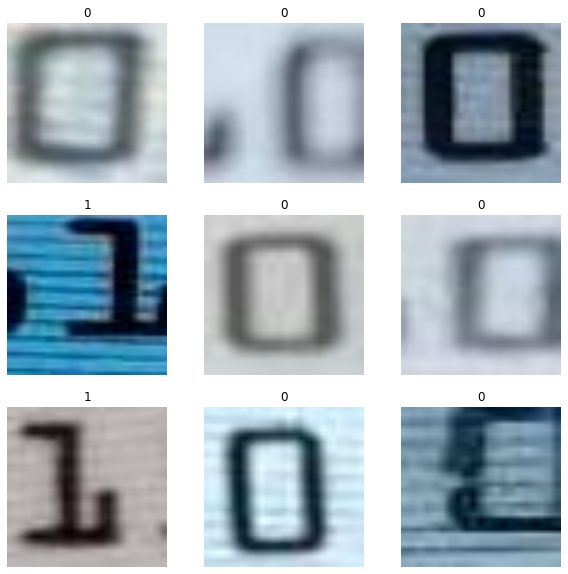

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # plt.title(class_names[labels[i]])
        plt.title(labels[i].numpy())
        plt.axis("off")

As the original dataset doesn't contain a test set, you will create one. To do so, determine how many batches of data are available in the validation set using `tf.data.experimental.cardinality`, then move 20% of them to a test set.

In [18]:
# val_batches = tf.data.experimental.cardinality(val_ds)
# test_dataset = val_ds.take(val_batches // 5)
# val_ds = val_ds.skip(val_batches // 5)

In [19]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_ds))

Number of validation batches: 32


In [20]:
print('Number of train batches: %d' % tf.data.experimental.cardinality(train_ds))

Number of train batches: 125


### Configure the dataset for performance

Use buffered prefetching to load images from disk without having I/O become blocking. To learn more about this method see the [data performance](https://www.tensorflow.org/guide/data_performance) guide.

In [21]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

### Use data augmentation

When you don't have a large image dataset, it's a good practice to artificially introduce sample diversity by applying random, yet realistic, transformations to the training images, such as rotation and horizontal flipping. This helps expose the model to different aspects of the training data and reduce [overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit). You can learn more about data augmentation in this [tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation).

In [40]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

Note: These layers are active only during training, when you call `Model.fit`. They are inactive when the model is used in inference mode in `Model.evaluate` or `Model.fit`.

Let's repeatedly apply these layers to the same image and see the result.

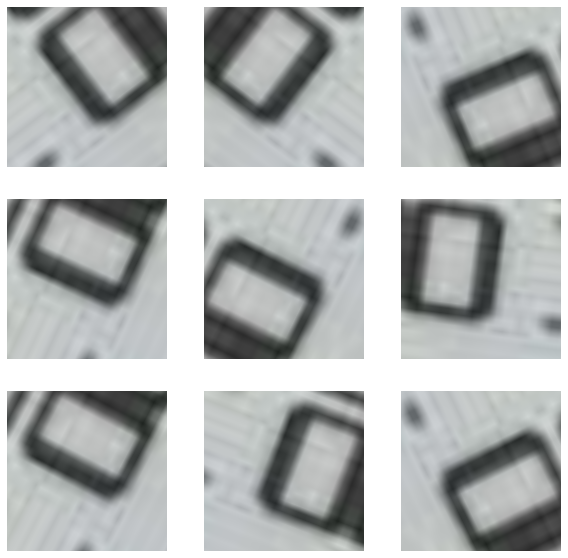

In [41]:
for image, _ in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

### Rescale pixel values

In a moment, you will download `tf.keras.applications.MobileNetV2` for use as your base model. This model expects pixel values in `[-1, 1]`, but at this point, the pixel values in your images are in `[0, 255]`. To rescale them, use the preprocessing method included with the model.

In [22]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

Note: Alternatively, you could rescale pixel values from `[0, 255]` to `[-1, 1]` using `tf.keras.layers.Rescaling`.

In [23]:
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

Note: If using other `tf.keras.applications`, be sure to check the API doc to determine if they expect pixels in `[-1, 1]` or `[0, 1]`, or use the included `preprocess_input` function.

## Create the base model from the pre-trained convnets
You will create the base model from the **MobileNet V2** model developed at Google. This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories like `jackfruit` and `syringe`. This base of knowledge will help us classify cats and dogs from our specific dataset.

First, you need to pick which layer of MobileNet V2 you will use for feature extraction. The very last classification layer (on "top", as most diagrams of machine learning models go from bottom to top) is not very useful. Instead, you will follow the common practice to depend on the very last layer before the flatten operation. This layer is called the "bottleneck layer". The bottleneck layer features retain more generality as compared to the final/top layer.

First, instantiate a MobileNet V2 model pre-loaded with weights trained on ImageNet. By specifying the **include_top=False** argument, you load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [29]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SIZE = (160,160)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

This feature extractor converts each `160x160x3` image into a `5x5x1280` block of features. Let's see what it does to an example batch of images:

In [30]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


## Feature extraction
In this step, you will freeze the convolutional base created from the previous step and to use as a feature extractor. Additionally, you add a classifier on top of it and train the top-level classifier.

### Freeze the convolutional base

It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. MobileNet V2 has many layers, so setting the entire model's `trainable` flag to False will freeze all of them.

In [31]:
base_model.trainable = False

### Important note about BatchNormalization layers

Many models contain `tf.keras.layers.BatchNormalization` layers. This layer is a special case and precautions should be taken in the context of fine-tuning, as shown later in this tutorial. 

When you set `layer.trainable = False`, the `BatchNormalization` layer will run in inference mode, and will not update its mean and variance statistics. 

When you unfreeze a model that contains BatchNormalization layers in order to do fine-tuning, you should keep the BatchNormalization layers in inference mode by passing `training = False` when calling the base model. Otherwise, the updates applied to the non-trainable weights will destroy what the model has learned.

For more details, see the [Transfer learning guide](https://www.tensorflow.org/guide/keras/transfer_learning).

In [27]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

### Add a classification head

To generate predictions from the block of features, average over the spatial `5x5` spatial locations, using a `tf.keras.layers.GlobalAveragePooling2D` layer to convert the features to  a single 1280-element vector per image.

In [32]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


Apply a `tf.keras.layers.Dense` layer to convert these features into a single prediction per image. You don't need an activation function here because this prediction will be treated as a `logit`, or a raw prediction value. Positive numbers predict class 1, negative numbers predict class 0.

In [33]:
prediction_layer = tf.keras.layers.Dense(len(class_names),activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 10)


Build a model by chaining together the data augmentation, rescaling, `base_model` and feature extractor layers using the [Keras Functional API](https://www.tensorflow.org/guide/keras/functional). As previously mentioned, use `training=False` as our model contains a `BatchNormalization` layer.

In [36]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

### Compile the model

Compile the model before training it. Since there are two classes, use the `tf.keras.losses.CategoricalCrossentropy` loss with `from_logits=True` since the model provides a linear output.

In [37]:
base_learning_rate = 0.0001

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                      

The 2.5 million parameters in MobileNet are frozen, but there are 1.2 thousand _trainable_ parameters in the Dense layer. These are divided between two `tf.Variable` objects, the weights and biases.

In [39]:
len(model.trainable_variables)

2

### Train the model

After training for 10 epochs, you should see ~94% accuracy on the validation set.

In [40]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_ds)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


32/32 [==============================] - 10s 235ms/step - loss: 2.7874 - accuracy: 0.1543


In [41]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.79
initial accuracy: 0.15


In [42]:
ts = time.time()
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)
print("Finished in {} s".format(time.time() - ts))

Epoch 1/10
125/125 [==============================] - 39s 293ms/step - loss: 2.0694 - accuracy: 0.3438 - val_loss: 1.6875 - val_accuracy: 0.4088
Epoch 2/10
125/125 [==============================] - 47s 378ms/step - loss: 1.4878 - accuracy: 0.5133 - val_loss: 1.3058 - val_accuracy: 0.5721
Epoch 3/10
125/125 [==============================] - 44s 356ms/step - loss: 1.1897 - accuracy: 0.6169 - val_loss: 1.0781 - val_accuracy: 0.6743
Epoch 4/10
125/125 [==============================] - 44s 351ms/step - loss: 1.0083 - accuracy: 0.6783 - val_loss: 0.9352 - val_accuracy: 0.7244
Epoch 5/10
125/125 [==============================] - 44s 351ms/step - loss: 0.8871 - accuracy: 0.7268 - val_loss: 0.8266 - val_accuracy: 0.7826
Epoch 6/10
125/125 [==============================] - 44s 355ms/step - loss: 0.7889 - accuracy: 0.7702 - val_loss: 0.7507 - val_accuracy: 0.7996
Epoch 7/10
125/125 [==============================] - 43s 341ms/step - loss: 0.7184 - accuracy: 0.7857 - val_loss: 0.6919 - val_ac

### Learning curves

Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNetV2 base model as a fixed feature extractor.

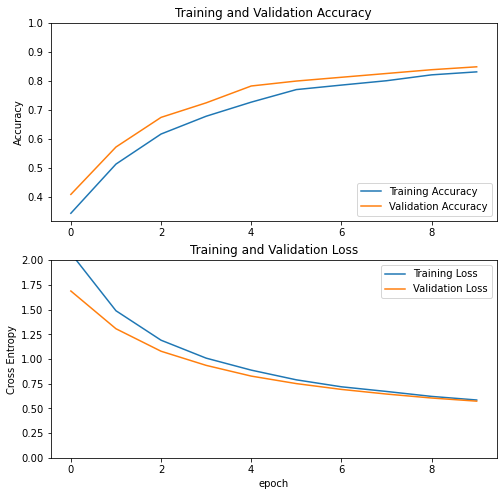

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Note: If you are wondering why the validation metrics are clearly better than the training metrics, the main factor is because layers like `tf.keras.layers.BatchNormalization` and `tf.keras.layers.Dropout` affect accuracy during training. They are turned off when calculating validation loss.

To a lesser extent, it is also because training metrics report the average for an epoch, while validation metrics are evaluated after the epoch, so validation metrics see a model that has trained slightly longer.

## Fine tuning
In the feature extraction experiment, you were only training a few layers on top of an MobileNetV2 base model. The weights of the pre-trained network were **not** updated during training.

One way to increase performance even further is to train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the classifier you added. The training process will force the weights to be tuned from generic feature maps to features associated specifically with the dataset.

Note: This should only be attempted after you have trained the top-level classifier with the pre-trained model set to non-trainable. If you add a randomly initialized classifier on top of a pre-trained model and attempt to train all layers jointly, the magnitude of the gradient updates will be too large (due to the random weights from the classifier) and your pre-trained model will forget what it has learned.

Also, you should try to fine-tune a small number of top layers rather than the whole MobileNet model. In most convolutional networks, the higher up a layer is, the more specialized it is. The first few layers learn very simple and generic features that generalize to almost all types of images. As you go higher up, the features are increasingly more specific to the dataset on which the model was trained. The goal of fine-tuning is to adapt these specialized features to work with the new dataset, rather than overwrite the generic learning.

### Un-freeze the top layers of the model

All you need to do is unfreeze the `base_model` and set the bottom layers to be un-trainable. Then, you should recompile the model (necessary for these changes to take effect), and resume training.

In [45]:
base_model.trainable = True

In [46]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


### Compile the model

As you are training a much larger model and want to readapt the pretrained weights, it is important to use a lower learning rate at this stage. Otherwise, your model could overfit very quickly.

In [47]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
          metrics=['accuracy'])

In [48]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                      

In [49]:
len(model.trainable_variables)

56

### Continue training the model

If you trained to convergence earlier, this step will improve your accuracy by a few percentage points.

In [50]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

ts = time.time()
history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)
print("Finished in {} s".format(time.time() - ts))

Epoch 10/20
125/125 [==============================] - 76s 579ms/step - loss: 0.3636 - accuracy: 0.8873 - val_loss: 0.0971 - val_accuracy: 0.9699
Epoch 11/20
125/125 [==============================] - 70s 559ms/step - loss: 0.0794 - accuracy: 0.9732 - val_loss: 0.1236 - val_accuracy: 0.9609
Epoch 12/20
125/125 [==============================] - 74s 590ms/step - loss: 0.0394 - accuracy: 0.9875 - val_loss: 0.0608 - val_accuracy: 0.9850
Epoch 13/20
125/125 [==============================] - 67s 534ms/step - loss: 0.0165 - accuracy: 0.9965 - val_loss: 0.1343 - val_accuracy: 0.9649
Epoch 14/20
125/125 [==============================] - 66s 525ms/step - loss: 0.0270 - accuracy: 0.9907 - val_loss: 0.0529 - val_accuracy: 0.9830
Epoch 15/20
125/125 [==============================] - 66s 527ms/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.0473 - val_accuracy: 0.9880
Epoch 16/20
125/125 [==============================] - 66s 532ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0374 -

Let's take a look at the learning curves of the training and validation accuracy/loss when fine-tuning the last few layers of the MobileNetV2 base model and training the classifier on top of it. The validation loss is much higher than the training loss, so you may get some overfitting.

You may also get some overfitting as the new training set is relatively small and similar to the original MobileNetV2 datasets.

After fine tuning the model nearly reaches 98% accuracy on the validation set.

In [51]:
len(acc)

10

In [52]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

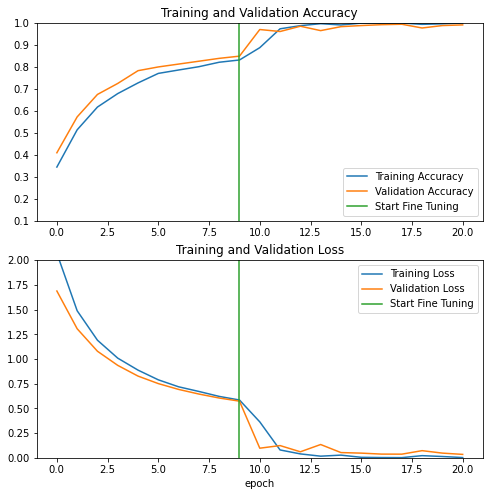

In [53]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.1, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 2.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [54]:
loss, accuracy = model.evaluate(val_ds)
print('Test accuracy :', accuracy)

32/32 [==============================] - 8s 246ms/step - loss: 0.0345 - accuracy: 0.9910
Test accuracy : 0.990981936454773


In [77]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('/home/jupyter/gurih_mas/digit_recognizer/models/DR_MobileNetV2.h5')